# Exploratory Analysis of Time Series Data

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
metropt = pd.read_csv("metroPT3.csv", nrows = 1000)

metropt.head(3)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [6]:
metropt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1000 non-null   int64  
 1   timestamp        1000 non-null   object 
 2   TP2              1000 non-null   float64
 3   TP3              1000 non-null   float64
 4   H1               1000 non-null   float64
 5   DV_pressure      1000 non-null   float64
 6   Reservoirs       1000 non-null   float64
 7   Oil_temperature  1000 non-null   float64
 8   Motor_current    1000 non-null   float64
 9   COMP             1000 non-null   float64
 10  DV_eletric       1000 non-null   float64
 11  Towers           1000 non-null   float64
 12  MPG              1000 non-null   float64
 13  LPS              1000 non-null   float64
 14  Pressure_switch  1000 non-null   float64
 15  Oil_level        1000 non-null   float64
 16  Caudal_impulses  1000 non-null   float64
dtypes: float64(15),

In [7]:
# Convert automatically to datetime
metropt['timestamp'] = pd.to_datetime(metropt['timestamp'])

metropt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       1000 non-null   int64         
 1   timestamp        1000 non-null   datetime64[ns]
 2   TP2              1000 non-null   float64       
 3   TP3              1000 non-null   float64       
 4   H1               1000 non-null   float64       
 5   DV_pressure      1000 non-null   float64       
 6   Reservoirs       1000 non-null   float64       
 7   Oil_temperature  1000 non-null   float64       
 8   Motor_current    1000 non-null   float64       
 9   COMP             1000 non-null   float64       
 10  DV_eletric       1000 non-null   float64       
 11  Towers           1000 non-null   float64       
 12  MPG              1000 non-null   float64       
 13  LPS              1000 non-null   float64       
 14  Pressure_switch  1000 non-null   float64 

In [8]:
metropt.head(5)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [9]:
metropt.head(5).transpose()

,0,1,2,3,4
Unnamed: 0,0,10,20,30,40
timestamp,2020-02-01 00:00:00,2020-02-01 00:00:10,2020-02-01 00:00:19,2020-02-01 00:00:29,2020-02-01 00:00:39
TP2,-0.012,-0.014,-0.012,-0.012,-0.012
TP3,9.358,9.348,9.338,9.328,9.318
H1,9.34,9.332,9.322,9.312,9.302
DV_pressure,-0.024,-0.022,-0.022,-0.022,-0.022
Reservoirs,9.358,9.348,9.338,9.328,9.318
Oil_temperature,53.6,53.675,53.6,53.425,53.475
Motor_current,0.04,0.04,0.0425,0.04,0.04
COMP,1.0,1.0,1.0,1.0,1.0


### Describe

In [11]:
metropt.describe()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.0
mean,4995.000000,2020-02-01 01:22:30.383999744,0.44767,8.947274,8.478302,-0.023106,8.947608,51.795800,1.123090,0.949000,0.051000,0.973000,0.949000,0.0,0.999000,1.0,1.0
min,0.000000,2020-02-01 00:00:00,-0.02600,8.066000,-0.028000,-0.026000,8.064000,49.225000,0.035000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,1.0
25%,2497.500000,2020-02-01 00:41:15.500000,-0.01400,8.458000,8.375500,-0.024000,8.458000,50.800000,0.040000,1.000000,0.000000,1.000000,1.000000,0.0,1.000000,1.0,1.0
50%,4995.000000,2020-02-01 01:22:30.500000,-0.01400,8.913000,8.839000,-0.024000,8.913000,52.200000,0.040000,1.000000,0.000000,1.000000,1.000000,0.0,1.000000,1.0,1.0
75%,7492.500000,2020-02-01 02:03:45.500000,-0.01200,9.404000,9.341000,-0.022000,9.404500,52.775000,3.765625,1.000000,0.000000,1.000000,1.000000,0.0,1.000000,1.0,1.0
max,9990.000000,2020-02-01 02:45:01,10.43400,10.098000,10.100000,-0.014000,10.098000,53.825000,6.312500,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.0,1.0
std,2888.194361,NaN,2.02640,0.555382,2.022623,0.001038,0.555115,1.219683,1.916456,0.220108,0.220108,0.162164,0.220108,0.0,0.031623,0.0,0.0


In [12]:
metropt.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Unnamed: 0,1000.0,4995.0,0.0,2497.5,4995.0,7492.5,9990.0,2888.194361
timestamp,1000,2020-02-01 01:22:30.383999744,2020-02-01 00:00:00,2020-02-01 00:41:15.500000,2020-02-01 01:22:30.500000,2020-02-01 02:03:45.500000,2020-02-01 02:45:01,NaN
TP2,1000.0,0.44767,-0.026,-0.014,-0.014,-0.012,10.434,2.0264
TP3,1000.0,8.947274,8.066,8.458,8.913,9.404,10.098,0.555382
H1,1000.0,8.478302,-0.028,8.3755,8.839,9.341,10.1,2.022623
DV_pressure,1000.0,-0.023106,-0.026,-0.024,-0.024,-0.022,-0.014,0.001038
Reservoirs,1000.0,8.947608,8.064,8.458,8.913,9.4045,10.098,0.555115
Oil_temperature,1000.0,51.7958,49.225,50.8,52.2,52.775,53.825,1.219683
Motor_current,1000.0,1.12309,0.035,0.04,0.04,3.765625,6.3125,1.916456
COMP,1000.0,0.949,0.0,1.0,1.0,1.0,1.0,0.220108


In [13]:
pd.DataFrame(data = metropt.mean(numeric_only = True), columns = ['Mean'])

,Mean
Unnamed: 0,4995.000000
TP2,0.447670
TP3,8.947274
H1,8.478302
DV_pressure,-0.023106
Reservoirs,8.947608
Oil_temperature,51.795800
Motor_current,1.123090
COMP,0.949000
DV_eletric,0.051000


In [14]:
pd.DataFrame(data = metropt.median(numeric_only = True), columns = ['Median'])

,Median
Unnamed: 0,4995.000
TP2,-0.014
TP3,8.913
H1,8.839
DV_pressure,-0.024
Reservoirs,8.913
Oil_temperature,52.200
Motor_current,0.040
COMP,1.000
DV_eletric,0.000


In [15]:
metropt.mode().head(2)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.014,9.454,-0.014,-0.024,8.548,52.725,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,NaN,9.608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
metropt.mode().head(1).transpose()

,0
Unnamed: 0,0
timestamp,2020-02-01 00:00:00
TP2,-0.014
TP3,9.454
H1,-0.014
DV_pressure,-0.024
Reservoirs,8.548
Oil_temperature,52.725
Motor_current,0.04
COMP,1.0


In [17]:
metropt.mode().head(2).transpose()

,0,1
Unnamed: 0,0,10
timestamp,2020-02-01 00:00:00,2020-02-01 00:00:10
TP2,-0.014,NaN
TP3,9.454,9.608
H1,-0.014,NaN
DV_pressure,-0.024,NaN
Reservoirs,8.548,NaN
Oil_temperature,52.725,NaN
Motor_current,0.04,NaN
COMP,1.0,NaN


In [18]:
metropt["timestamp"]

0     2020-02-01 00:00:00
1     2020-02-01 00:00:10
2     2020-02-01 00:00:19
3     2020-02-01 00:00:29
4     2020-02-01 00:00:39
              ...        
995   2020-02-01 02:44:21
996   2020-02-01 02:44:31
997   2020-02-01 02:44:41
998   2020-02-01 02:44:51
999   2020-02-01 02:45:01
Name: timestamp, Length: 1000, dtype: datetime64[ns]

Sets the column 'timestamp' as the index of the DataFrame metropt with a new dataframe with 'Oil_temperature'

In [20]:
decomp_df = metropt.set_index('timestamp')[['Oil_temperature']]
decomp_df

,Oil_temperature
timestamp,
2020-02-01 00:00:00,53.600
2020-02-01 00:00:10,53.675
2020-02-01 00:00:19,53.600
2020-02-01 00:00:29,53.425
2020-02-01 00:00:39,53.475
...,...
2020-02-01 02:44:21,52.325
2020-02-01 02:44:31,52.325
2020-02-01 02:44:41,52.325


In [21]:
# Applies Seasonal-Trend decomposition using LOESS (STL) with a periodicity of 60
decomposition = STL(decomp_df, period=60).fit()  

# Retrieves the number of observations used in the decomposition
decomposition.nobs  

decomposition.observed

,Oil_temperature
timestamp,
2020-02-01 00:00:00,53.600
2020-02-01 00:00:10,53.675
2020-02-01 00:00:19,53.600
2020-02-01 00:00:29,53.425
2020-02-01 00:00:39,53.475
...,...
2020-02-01 02:44:21,52.325
2020-02-01 02:44:31,52.325
2020-02-01 02:44:41,52.325


In [22]:
decomposition = STL(decomp_df, period = 60).fit()

decomposition.nobs

(1000, 1)

In [23]:
# Returns the original time series data used for STL decomposition
decomposition.observed 

,Oil_temperature
timestamp,
2020-02-01 00:00:00,53.600
2020-02-01 00:00:10,53.675
2020-02-01 00:00:19,53.600
2020-02-01 00:00:29,53.425
2020-02-01 00:00:39,53.475
...,...
2020-02-01 02:44:21,52.325
2020-02-01 02:44:31,52.325
2020-02-01 02:44:41,52.325


In [24]:
# Retrieves the residual component (observed - (trend + seasonal)) from the STL decomposition
decomposition.resid  

timestamp
2020-02-01 00:00:00   -0.116297
2020-02-01 00:00:10    0.016401
2020-02-01 00:00:19   -0.022917
2020-02-01 00:00:29   -0.125004
2020-02-01 00:00:39   -0.020982
                         ...   
2020-02-01 02:44:21    0.097748
2020-02-01 02:44:31    0.064282
2020-02-01 02:44:41    0.065208
2020-02-01 02:44:51    0.115817
2020-02-01 02:45:01    0.072078
Name: resid, Length: 1000, dtype: float64

In [25]:
# Retrieves the seasonal component of the time series from the STL decomposition
decomposition.seasonal  

timestamp
2020-02-01 00:00:00   -0.098487
2020-02-01 00:00:10   -0.130924
2020-02-01 00:00:19   -0.141357
2020-02-01 00:00:29   -0.189032
2020-02-01 00:00:39   -0.217827
                         ...   
2020-02-01 02:44:21    0.333140
2020-02-01 02:44:31    0.334104
2020-02-01 02:44:41    0.300552
2020-02-01 02:44:51    0.292195
2020-02-01 02:45:01    0.328071
Name: season, Length: 1000, dtype: float64

In [26]:
# Retrieves the trend component of the time series from the STL decomposition
decomposition.trend  

timestamp
2020-02-01 00:00:00    53.814783
2020-02-01 00:00:10    53.789524
2020-02-01 00:00:19    53.764274
2020-02-01 00:00:29    53.739036
2020-02-01 00:00:39    53.713810
                         ...    
2020-02-01 02:44:21    51.894112
2020-02-01 02:44:31    51.926614
2020-02-01 02:44:41    51.959241
2020-02-01 02:44:51    51.991988
2020-02-01 02:45:01    52.024851
Name: trend, Length: 1000, dtype: float64

In [27]:
# Returns the robustness weights used in the STL decomposition, useful for detecting outliers
decomposition.weights  

timestamp
2020-02-01 00:00:00    1.0
2020-02-01 00:00:10    1.0
2020-02-01 00:00:19    1.0
2020-02-01 00:00:29    1.0
2020-02-01 00:00:39    1.0
                      ... 
2020-02-01 02:44:21    1.0
2020-02-01 02:44:31    1.0
2020-02-01 02:44:41    1.0
2020-02-01 02:44:51    1.0
2020-02-01 02:45:01    1.0
Name: robust_weight, Length: 1000, dtype: float64

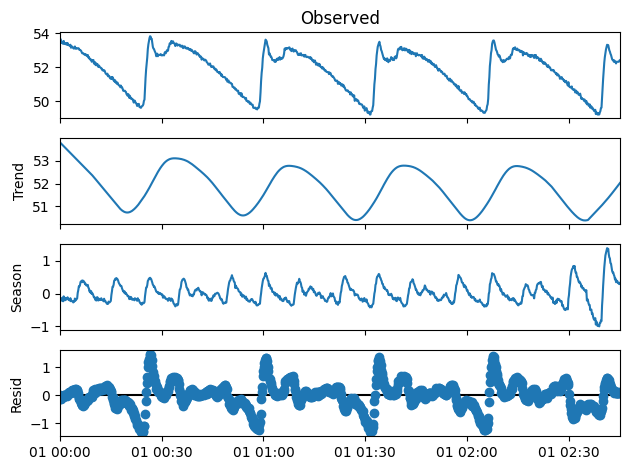

In [28]:
decomposition.plot()
plt.show()

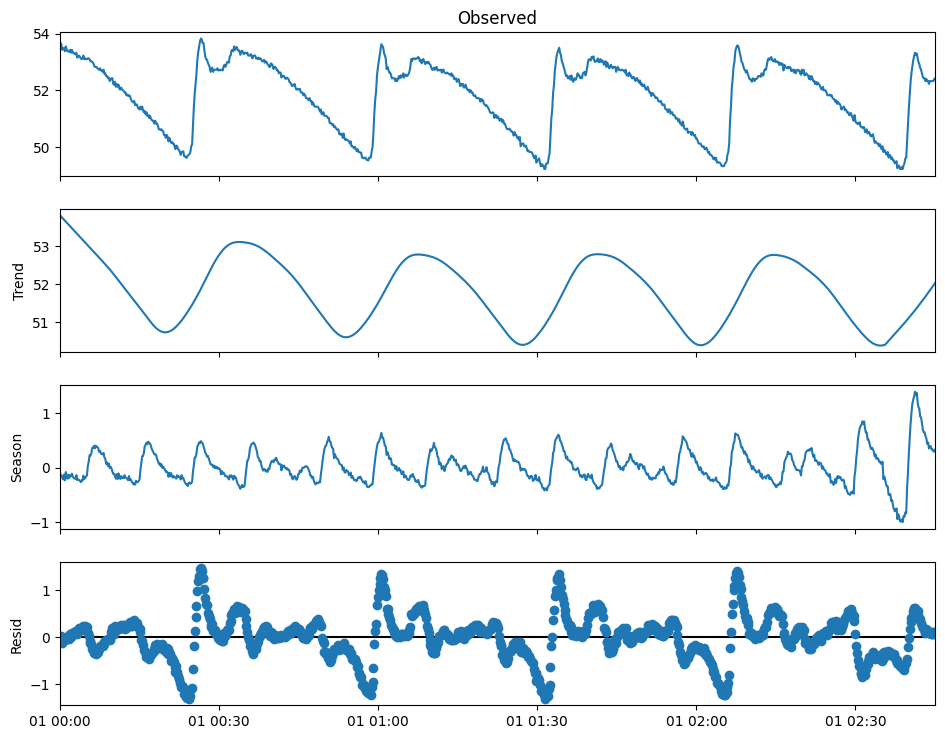

In [29]:
fig = decomposition.plot()  # Generate the STL decomposition plot
fig.set_size_inches(10, 8)  # Set figure size (width=12, height=8 inches)

plt.show()                  # Display the plot

### Augmented Dickey Fuller (ADF)

In [31]:
# Augmented Dickey Fuller (ADF): Not stationary (H0), Stationary (Ha)

adf_test = adfuller(decomp_df)
adf_test

(-3.8848703734235457,
 0.002149057707608802,
 14,
 985,
 {'1%': -3.4370062675076807,
  '5%': -2.8644787205542492,
  '10%': -2.568334722615888},
 -1763.9475102957003)

In [32]:
df_adf = pd.DataFrame([[adf_test[0], adf_test[1], adf_test[2], adf_test[3], 
                        adf_test[4]['1%'], adf_test[4]['5%'],adf_test[4]['10%'], adf_test[5]]])

df_adf.columns = ['ADF Test Statistic', 'PValue', 'Used Lag', 'No. of observations', 
                  'Critical Value 1%',  'Critical Value 5%',  'Critical Value 10%', 'ICBest']

df_adf

,ADF Test Statistic,PValue,Used Lag,No. of observations,Critical Value 1%,Critical Value 5%,Critical Value 10%,ICBest
0,-3.88487,0.002149,14,985,-3.437006,-2.864479,-2.568335,-1763.94751


In [33]:
df_adf.transpose()

,0
ADF Test Statistic,-3.884870
PValue,0.002149
Used Lag,14.000000
No. of observations,985.000000
Critical Value 1%,-3.437006
Critical Value 5%,-2.864479
Critical Value 10%,-2.568335
ICBest,-1763.947510


In [34]:
def check_stationary(pval):
    if (pval) > 0.05:
        print ('Time series is non-stationary')
    else:
        print ('Time series is stationary')

check_stationary(adf_test[1])

Time series is stationary


In [35]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(decomp_df)

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -3.8848703734235457
p-value: 0.002149057707608802

p-value < alpha; Ha: Stationary


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

In [37]:
kpss_test = kpss(decomp_df)

kpss_test

(0.24039580088250742,
 0.1,
 19,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [38]:
df_kpss = pd.DataFrame([[kpss_test[0], kpss_test[1], kpss_test[2], 
                         kpss_test[3]['10%'], kpss_test[3]['5%'],kpss_test[3]['2.5%'], kpss_test[3]['1%']]])

df_kpss.columns = ['KPSS Test Statistic', 'PValue', 'Lags', 
                  'Critical Value 10%',  'Critical Value 5%',  'Critical Value 2.5%', 'Critical Value 1%']

df_kpss

,KPSS Test Statistic,PValue,Lags,Critical Value 10%,Critical Value 5%,Critical Value 2.5%,Critical Value 1%
0,0.240396,0.1,19,0.347,0.463,0.574,0.739


In [39]:
df_kpss.transpose()

,0
KPSS Test Statistic,0.240396
PValue,0.100000
Lags,19.000000
Critical Value 10%,0.347000
Critical Value 5%,0.463000
Critical Value 2.5%,0.574000
Critical Value 1%,0.739000


In [40]:
def check_stationary_kpss(pval):
    if (pval) > 0.05:
        print ('Time series is stationary')
    else:
        print ('Time series is non-stationary')

check_stationary_kpss(kpss_test[1])

Time series is stationary


### AutoCorrelation (ACF)

In [42]:
decomp_df

,Oil_temperature
timestamp,
2020-02-01 00:00:00,53.600
2020-02-01 00:00:10,53.675
2020-02-01 00:00:19,53.600
2020-02-01 00:00:29,53.425
2020-02-01 00:00:39,53.475
...,...
2020-02-01 02:44:21,52.325
2020-02-01 02:44:31,52.325
2020-02-01 02:44:41,52.325


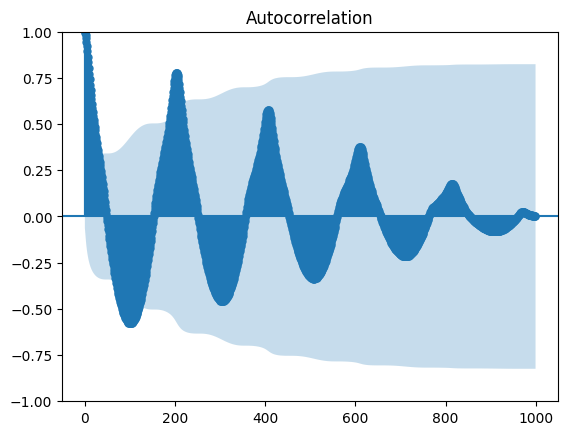

In [43]:
plot_acf(decomp_df, lags = 999)
plt.show()

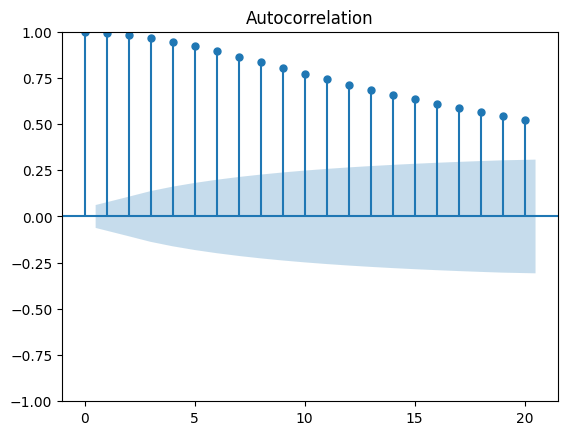

In [44]:
plot_acf(decomp_df, lags = 20)
plt.show()

### Partial AutoCorrelation (PACF)

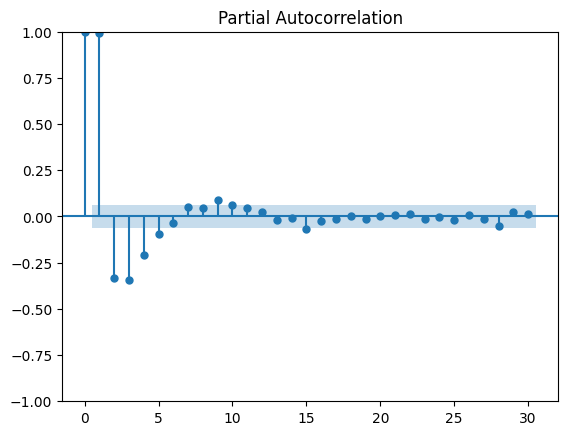

In [46]:
plot_pacf(decomp_df, lags = 30)
plt.show()

### Exploring Rolling Statistics

Rolling statistics and moving averages are measures that
can be calculated on the time series data to understand the
movement of data over a specific window after noise
smoothening. These measures will help in studying the
underlying patterns and trends in the data.

Let us set a window size of 60 and calculate the rolling
statistics of oil temperature in the decomp_df dataset.

In [50]:
window = 60

# Computes the rolling standard deviation over a moving window of 60 periods
rolling_std = decomp_df.rolling(window=window).std()

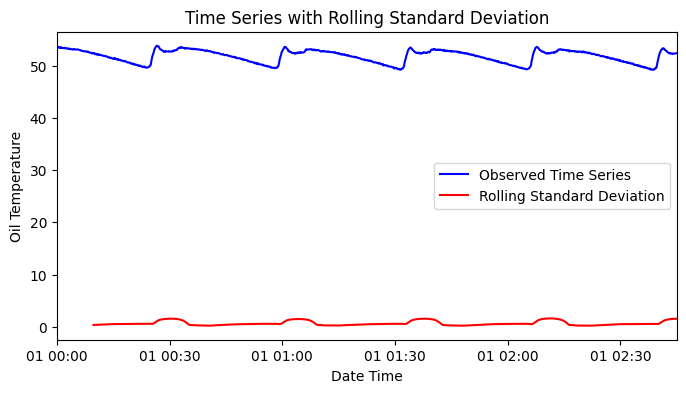

In [51]:
plt.figure(figsize=(8, 4))

plt.plot(decomp_df, label='Observed Time Series', color='blue')
plt.plot(rolling_std, label='Rolling Standard Deviation', color='red')

plt.xlabel('Date Time')
plt.ylabel('Oil Temperature')
plt.title('Time Series with Rolling Standard Deviation')

plt.gca().set_xlim(pd.Timestamp('2020-02-01 00:00:00'), pd.Timestamp('2020-02-01 02:45:01')) 

plt.legend()
plt.show()

In [52]:
# Computes the rolling median over a moving window of 60 periods
rolling_median = decomp_df.rolling(window=window).median()

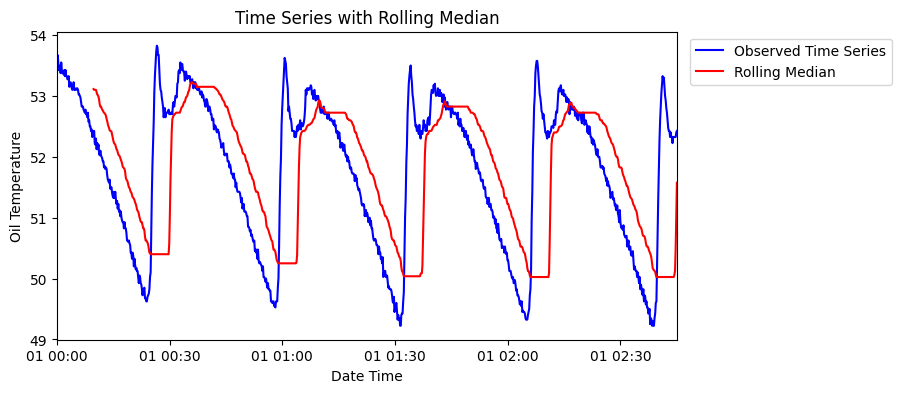

In [53]:
plt.figure(figsize=(8, 4))

plt.plot(decomp_df, label='Observed Time Series', color='blue')
plt.plot(rolling_median, label='Rolling Median', color='red')

plt.xlabel('Date Time')
plt.ylabel('Oil Temperature')
plt.title('Time Series with Rolling Median')
plt.legend(bbox_to_anchor=(1.01, 1))

plt.gca().set_xlim(pd.Timestamp('2020-02-01 00:00:00'), pd.Timestamp('2020-02-01 02:45:01')) 

plt.show()

In [54]:
rolling_mean = decomp_df.rolling(window=window).mean()

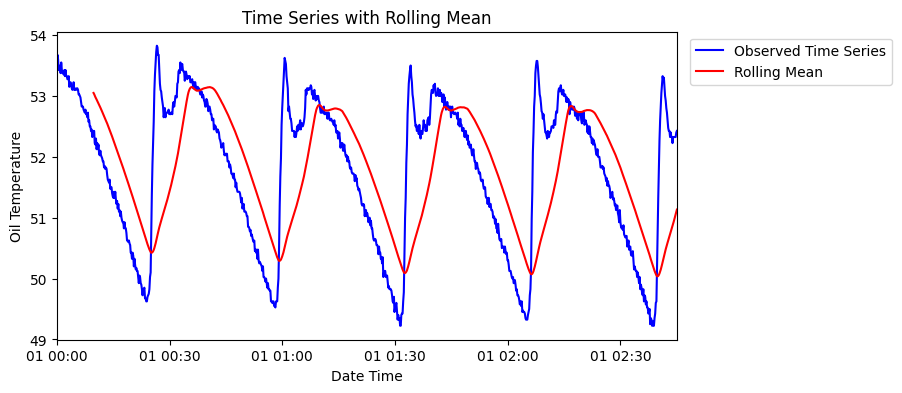

In [55]:
plt.figure(figsize=(8, 4))

plt.plot(decomp_df, label='Observed Time Series', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')

plt.xlabel('Date Time')
plt.ylabel('Oil Temperature')
plt.title('Time Series with Rolling Mean')
plt.legend(bbox_to_anchor=(1.01, 1))

plt.gca().set_xlim(pd.Timestamp('2020-02-01 00:00:00'), pd.Timestamp('2020-02-01 02:45:01')) 

plt.show()